In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [3]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)

m = len(X)

numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_X) * (Y[i] - mean_Y)
    denom += (X[i] - mean_X) ** 2
slope = numer / denom
c = mean_Y - (slope * mean_X)

print(slope, c)

0.26342933948939945 325.57342104944223


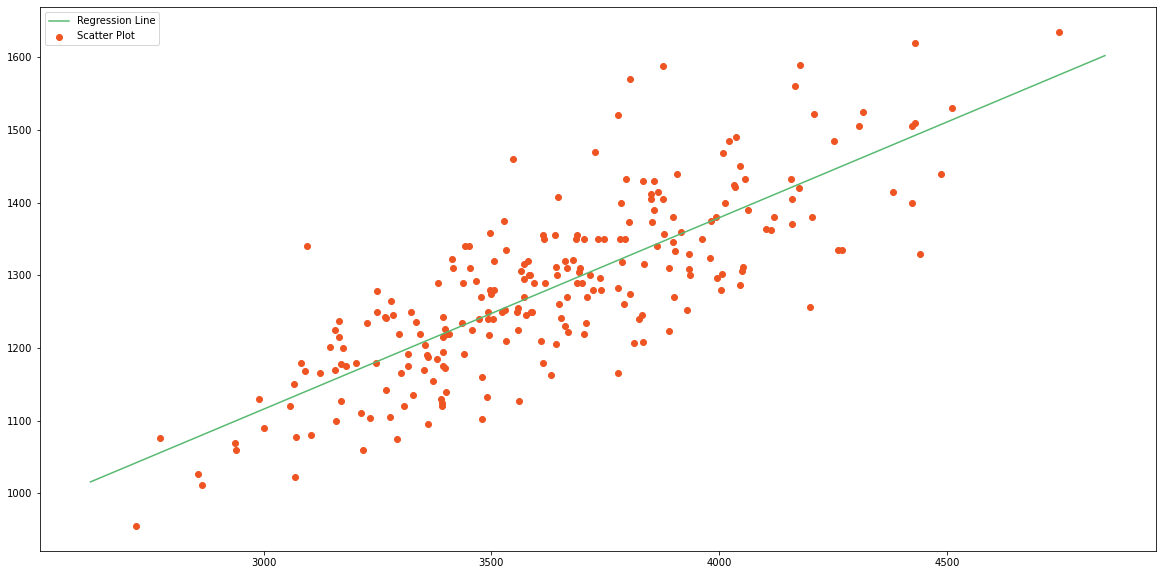

In [4]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = c + slope * x

plt.plot(x, y, color = '#58b970', label = 'Regression Line')
plt.scatter(X, Y, c = '#ef5423', label = 'Scatter Plot')

plt.legend()
plt.show()

In [5]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = c + slope * X[i]
    ss_t += (Y[i] - mean_Y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((m,1))
reg = LinearRegression()

reg = reg.fit(X, Y)

Y_pred = reg.predict(X)

r2_score = reg.score(X, Y)

print(r2_score)

0.639311719957
